
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2024**

---

# Trabajo práctico entregable - Parte 2

Grupo de Trabajo nº 20

Integrantes:
*   Gabriela Artazo
*   Pablo Iribarren
*   Julia Martin
*   Daniela Paira

## **Exploracion de la base de datos**

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


In [ ]:
df.columns
#Para ver el nombre de las columnas

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

In [ ]:
df.profile_gender.unique()
#Para ver las respuestas en la columna genero

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.', 'Queer',
       'Mujer Trans', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Varón', 'Bigénero', 'Mujer', 'Transformer',
       'Fluido', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre

In [ ]:
frecuencia_genero = df['profile_gender'].value_counts().head(30)

print(frecuencia_genero)
#Para ver la cantidad de las primeras 30 respuestas. Con este código obtenemos las frecuencias de esas primeras respuestas.

profile_gender
Varón Cis                                                                                      4148
Mujer Cis                                                                                      1020
Prefiero no decir                                                                               237
Hombre                                                                                           61
No binarie                                                                                       33
Agénero                                                                                          22
Masculino                                                                                        21
Varón                                                                                            17
Bigénero                                                                                         16
Varon                                                                                

In [ ]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis', 'Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)
#Este código se utiliza para categorizar las respuestas en Varon cis y Mujer cis + Diversidad
# La primera es la respuesta de las personas encuestadas, lo segundo la categoria nueva

In [ ]:
# Calcular la frecuencia de cada categoría y ordenar de mayor a menor Frecuencia
frecuencia_genero = df['profile_g'].value_counts().head(20)

print(frecuencia_genero)

profile_g
Varón cis            4148
Mujer cis            1036
Prefiero no decir     237
Diversidades           96
Hombre                 61
Agénero                22
Masculino              21
Varón                  17
Varon                  15
hombre                 12
Heterosexual            3
masculino               3
Normal                  3
HOMBRE                  3
No entiendo             2
Macho                   2
cis                     2
Hombre Normal           2
hetero                  2
que pelotudos eh        1
Name: count, dtype: int64


In [ ]:
# Para no perder demasiados datos, debido a que existen respuestas distintas para indicar el mismo género, se realizó una categorización de dicha variable.

df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Hombre': 'Varón cis', 'Masculino': 'Varón cis', 'Varón': 'Varón cis', 'Varon': 'Varón cis', 'hombre': 'Varón cis', 'HOMBRE': 'Varón cis', 'masculino': 'Varón cis', 'Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)
#Para categorizar las respuestas en Varon cis y Mujer cis (Con minuscula el cis)

#'Varón cis': 1) Varón Cis' 2) Hombre 3) Masculino 4) Varón 5) Varon 6) hombre 7)masculino 8)HOMBRE
#'Mujer cis': 1)'Mujer Cis', 2)'Femenino', 3) 'mujer', 4)'Mujer
#'Diversidades': 1)'Queer', 2) 'Varón Trans', 3)'No binarie', 4)'Mujer Trans', 5)'Fluido', 6)'Bigénero' 7)'Gay'

In [ ]:
# Calcular la frecuencia de cada categoría y ordenar de mayor a menor (con esta nueva categorización) sumando más datos a las 3 categorias principales
frecuencia_genero = df['profile_g'].value_counts().head(10)

print(frecuencia_genero)

profile_g
Varón cis            4280
Mujer cis            1036
Prefiero no decir     237
Diversidades           96
Agénero                22
Normal                  3
Heterosexual            3
hetero                  2
Hombre Normal           2
cis                     2
Name: count, dtype: int64


De los resultados de frecuencia vemos que existe un mayor número de varones cis.

En las siguientes tablas se visualiza la diferencia de frecuencias entre ambas categorizaciones (la segunda es la que amplía el número de datos).


Primera categorización:                          
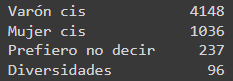

Segunda categorización:

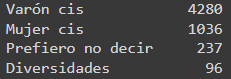

In [ ]:
alpha = 0.05
# Cuando establecemos un nivel de significancia de 0.05 (α = 0.05), estamos diciendo que estamos dispuestos a aceptar un riesgo del 5% de cometer un error de tipo I.

Se aplican los filtros a la última base de datos generada para definir el código de cada grupo

In [ ]:
# Crear un filtro para varón cis
is_man = df.profile_g == 'Varón cis'

# Crear un filtro para mujer cis y diversidades
is_woman_diversity = df.profile_g.isin(['Mujer cis', 'Diversidades'])

# Crear los grupos
groupA = df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 10000) & is_woman_diversity].salary_monthly_NETO

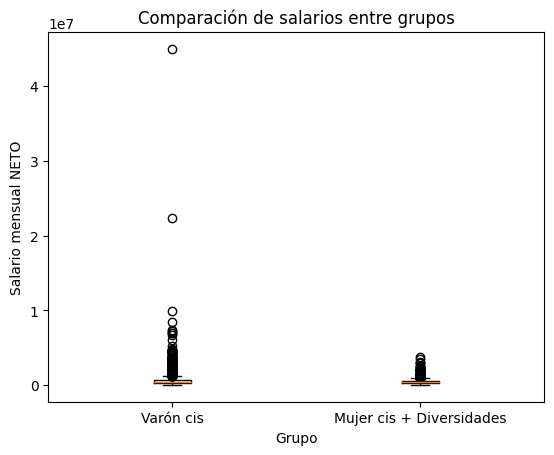

In [ ]:
import matplotlib.pyplot as plt

# Crear una lista con los datos de los dos grupos
data = [groupA, groupB]

# Crear el boxplot
plt.boxplot(data, labels=['Varón cis', 'Mujer cis + Diversidades'])

# Agregar título y etiquetas
plt.title('Comparación de salarios entre grupos')
plt.xlabel('Grupo')
plt.ylabel('Salario mensual NETO')

# Mostrar el boxplot
plt.show()

En gráfico se observa que el grupo varón cis percibe un salario mensual neto ampliamente superios al percibido al grupo mujer cis + diversidades.

In [ ]:
# Calcular estadísticas para cada grupo
stats_groupA = groupA.describe()
stats_groupB = groupB.describe()

# Imprimir las estadísticas
print("Grupo Varón cis:")
print("Media:", stats_groupA['mean'])
print("Mediana:", groupA.median())
print("Cuartiles:")
print(stats_groupA[['25%', '50%', '75%']])
print("Cantidad de datos:", stats_groupA['count'])
print()

print("Grupo Mujer cis + Diversidades:")
print("Media:", stats_groupB['mean'])
print("Mediana:", groupB.median())
print("Cuartiles:")
print(stats_groupB[['25%', '50%', '75%']])
print("Cantidad de datos:", stats_groupB['count'])

Grupo Varón cis:
Media: 630009.2346283563
Mediana: 430000.0
Cuartiles:
25%    297000.0
50%    430000.0
75%    646213.0
Name: salary_monthly_NETO, dtype: float64
Cantidad de datos: 3918.0

Grupo Mujer cis + Diversidades:
Media: 446424.08972616633
Mediana: 356109.5
Cuartiles:
25%    233368.75
50%    356109.50
75%    492000.00
Name: salary_monthly_NETO, dtype: float64
Cantidad de datos: 986.0


Destacamos de los datos estadísticos mostrados que la media del grupo varón cis es significativamente mayor (630009 vs 446424).

De acuerdo a lo procedido en el entregable 1, procedemos a filtrar los salarios por un minimo de 99036 y un maximo de percentil 95.

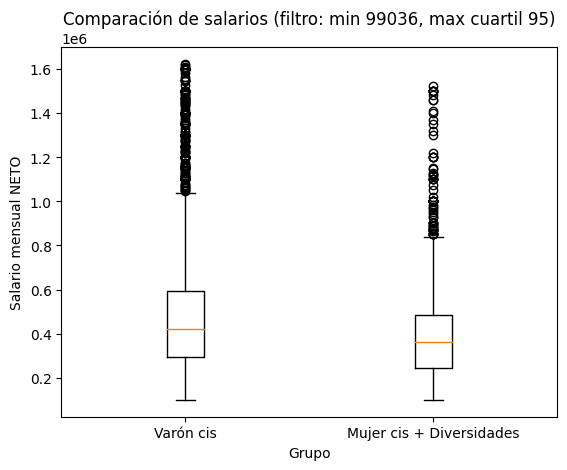

In [ ]:
# Calcular el cuartil 95
q95 = df.salary_monthly_NETO.quantile(0.95)

# Filtrar los salarios dentro del rango especificado
filtered_groupA = groupA[(groupA >= 99036) & (groupA <= q95)]
filtered_groupB = groupB[(groupB >= 99036) & (groupB <= q95)]

# Crear una lista con los datos filtrados de los dos grupos
filtered_data = [filtered_groupA, filtered_groupB]

# Crear el nuevo boxplot con los datos filtrados
plt.boxplot(filtered_data, labels=['Varón cis', 'Mujer cis + Diversidades'])

# Agregar título y etiquetas
plt.title('Comparación de salarios (filtro: min 99036, max cuartil 95)')
plt.xlabel('Grupo')
plt.ylabel('Salario mensual NETO')

# Mostrar el boxplot
plt.show()

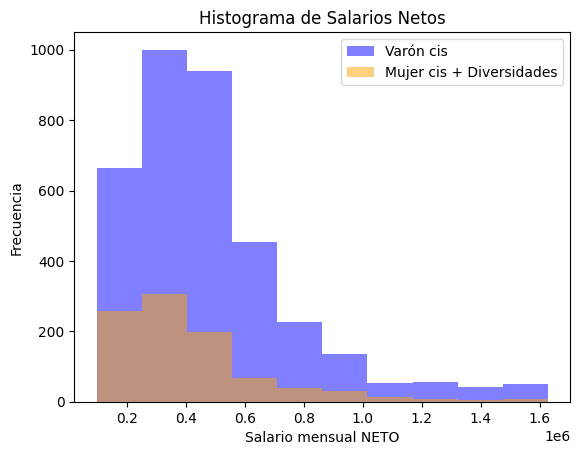

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los límites del histograma
bin_edges = np.linspace(99036, q95, 11)  # 10 bins entre el salario mínimo filtrado y el cuartil 95

# Crear el histograma para cada grupo
plt.hist(filtered_groupA, bins=bin_edges, color='blue', alpha=0.5, label='Varón cis')
plt.hist(filtered_groupB, bins=bin_edges, color='orange', alpha=0.5, label='Mujer cis + Diversidades')

# Agregar título y etiquetas
plt.title('Histograma de Salarios Netos')
plt.xlabel('Salario mensual NETO')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

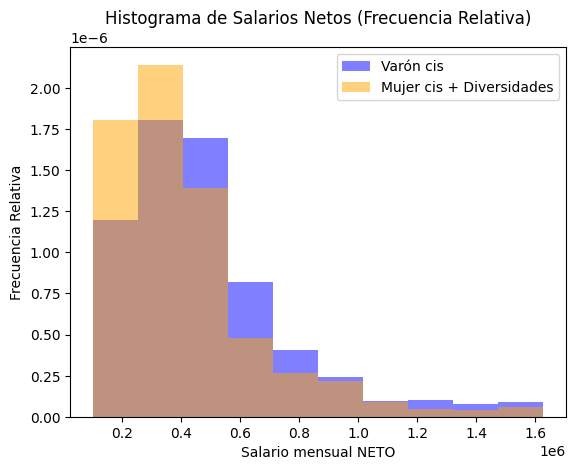

In [ ]:
import matplotlib.pyplot as plt

# Definir los límites del histograma
bin_edges = np.linspace(99036, q95, 11)  # 10 bins entre el salario mínimo filtrado y el cuartil 95

# Crear el histograma para cada grupo con frecuencia relativa
plt.hist(filtered_groupA, bins=bin_edges, color='blue', alpha=0.5, label='Varón cis', density=True)
plt.hist(filtered_groupB, bins=bin_edges, color='orange', alpha=0.5, label='Mujer cis + Diversidades', density=True)

# Agregar título y etiquetas
plt.title('Histograma de Salarios Netos (Frecuencia Relativa)')
plt.xlabel('Salario mensual NETO')
plt.ylabel('Frecuencia Relativa')
plt.legend()

# Mostrar el histograma
plt.show()

En este ultimo gráfico se utiliza Frecuencia Relativa:

-La frecuencia relativa indica la proporción de observaciones en cada bin en relación con el total de observaciones en el grupo.

-Expresa la distribución de los salarios como porcentajes del total de observaciones en cada grupo.

-Útil para comparar la distribución de los salarios entre grupos de diferentes tamaños.

In [ ]:
# Calcular estadísticas para cada grupo filtrado
stats_filtered_groupA = filtered_groupA.describe()
stats_filtered_groupB = filtered_groupB.describe()

# Imprimir las estadísticas para los datos filtrados
print("Grupo Varón cis (después del filtro):")
print("Media:", stats_filtered_groupA['mean'])
print("Mediana:", filtered_groupA.median())
print("Cuartiles:")
print(stats_filtered_groupA[['25%', '50%', '75%']])
print("Cantidad de datos:", stats_filtered_groupA['count'])
print()

print("Grupo Mujer cis + Diversidades (después del filtro):")
print("Media:", stats_filtered_groupB['mean'])
print("Mediana:", filtered_groupB.median())
print("Cuartiles:")
print(stats_filtered_groupB[['25%', '50%', '75%']])
print("Cantidad de datos:", stats_filtered_groupB['count'])

Grupo Varón cis (después del filtro):
Media: 486030.1634264917
Mediana: 420000.0
Cuartiles:
25%    296000.0
50%    420000.0
75%    594589.0
Name: salary_monthly_NETO, dtype: float64
Cantidad de datos: 3620.0

Grupo Mujer cis + Diversidades (después del filtro):
Media: 414890.9210204082
Mediana: 360000.0
Cuartiles:
25%    244942.5
50%    360000.0
75%    485500.0
Name: salary_monthly_NETO, dtype: float64
Cantidad de datos: 931.0


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Prueba de Levene para homogeneidad de varianzas:
Estadístico de prueba: 11.291276983001097
Valor p: 0.0007851353482029392

Prueba de Bartlett para homogeneidad de varianzas:
Estadístico de prueba: 15.891265336332337
Valor p: 6.708762222415991e-05

Prueba de Shapiro-Wilk para normalidad (Grupo A):
Estadístico de prueba: 0.8673723936080933
Valor p: 0.0

Prueba de Shapiro-Wilk para normalidad (Grupo B):
Estadístico de prueba: 0.8342078328132629
Valor p: 5.202291120807036e-30

Q-Q plot para normalidad (Grupo A):


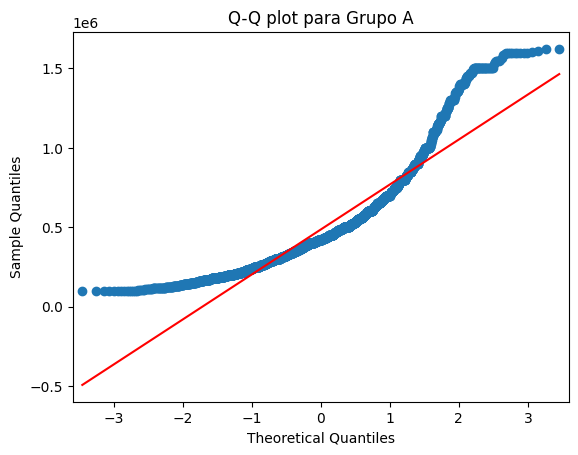


Q-Q plot para normalidad (Grupo B):


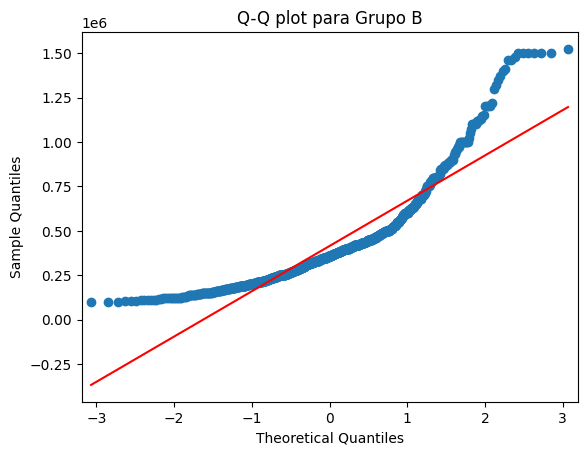

In [ ]:
from scipy import stats
import statsmodels.api as sm

# Prueba de homogeneidad de varianzas
levene_test = stats.levene(filtered_groupA, filtered_groupB)
bartlett_test = stats.bartlett(filtered_groupA, filtered_groupB)

print("Prueba de Levene para homogeneidad de varianzas:")
print("Estadístico de prueba:", levene_test.statistic)
print("Valor p:", levene_test.pvalue)

print("\nPrueba de Bartlett para homogeneidad de varianzas:")
print("Estadístico de prueba:", bartlett_test.statistic)
print("Valor p:", bartlett_test.pvalue)

# Prueba de normalidad
shapiro_test_A = stats.shapiro(filtered_groupA)
shapiro_test_B = stats.shapiro(filtered_groupB)

print("\nPrueba de Shapiro-Wilk para normalidad (Grupo A):")
print("Estadístico de prueba:", shapiro_test_A.statistic)
print("Valor p:", shapiro_test_A.pvalue)

print("\nPrueba de Shapiro-Wilk para normalidad (Grupo B):")
print("Estadístico de prueba:", shapiro_test_B.statistic)
print("Valor p:", shapiro_test_B.pvalue)

# Prueba de normalidad utilizando Q-Q plots
print("\nQ-Q plot para normalidad (Grupo A):")
sm.qqplot(filtered_groupA, line='s')
plt.title('Q-Q plot para Grupo A')
plt.show()

print("\nQ-Q plot para normalidad (Grupo B):")
sm.qqplot(filtered_groupB, line='s')
plt.title('Q-Q plot para Grupo B')
plt.show()


Dado que las pruebas de homogeneidad de varianzas (Levene y Bartlett) y las pruebas de normalidad (Shapiro-Wilk) han rechazado las hipótesis de homogeneidad de varianzas y normalidad para ambos grupos, las condiciones para aplicar el test t de Student clásico no se cumplen completamente. Sin embargo, aún puedes considerar el uso del test t de Welch, que es una alternativa robusta al test t de Student cuando las varianzas de las muestras son diferentes y las distribuciones no son necesariamente normales.

In [ ]:
import numpy as np
from scipy import stats

# Calcular la diferencia entre las medias de los dos grupos
mean_difference = np.mean(filtered_groupA) - np.mean(filtered_groupB)

# Calcular la desviación estándar y el tamaño de la muestra de cada grupo
std_A = np.std(filtered_groupA, ddof=1)  # Usar ddof=1 para calcular la desviación estándar muestral
std_B = np.std(filtered_groupB, ddof=1)
n_A = len(filtered_groupA)
n_B = len(filtered_groupB)

# Calcular el error estándar de la diferencia entre las medias utilizando la fórmula de Welch
se = np.sqrt((std_A**2 / n_A) + (std_B**2 / n_B))

# Calcular los grados de libertad efectivos utilizando la fórmula de Welch-Satterthwaite
df = ((std_A**2 / n_A + std_B**2 / n_B)**2) / ((std_A**2 / n_A)**2 / (n_A - 1) + (std_B**2 / n_B)**2 / (n_B - 1))

# Calcular el intervalo de confianza utilizando la distribución t de Student
t_critical = stats.t.ppf(1 - 0.05/2, df=df)  # Valor crítico de t para el nivel de confianza deseado

# Calcular los límites del intervalo de confianza
margin_of_error = t_critical * se
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error

# Imprimir la estimación puntual y el intervalo de confianza
print("Estimación puntual de la diferencia de medias (Welch):", mean_difference)
print("Intervalo de confianza del 95% para la diferencia de medias (Welch): ({:.2f}, {:.2f})".format(lower_bound, upper_bound))


Estimación puntual de la diferencia de medias (Welch): 71139.2424060835
Intervalo de confianza del 95% para la diferencia de medias (Welch): (52329.35, 89949.14)



El intervalo de confianza y el test de hipótesis están estrechamente relacionados y se utilizan comúnmente en inferencia estadística para tomar decisiones sobre las poblaciones basadas en muestras de datos.

Intervalo de Confianza: Un intervalo de confianza es un rango de valores estimados que, con cierto nivel de confianza, contiene el parámetro de interés (en este caso, la diferencia entre las medias de dos poblaciones).

Test de Hipótesis: Un test de hipótesis es una técnica utilizada para tomar decisiones sobre las hipótesis acerca de los parámetros de la población, basadas en las muestras de datos observadas. En el contexto de la diferencia entre las medias de dos poblaciones, una hipótesis nula (H0) podría ser que no hay diferencia entre las medias (es decir, la diferencia es igual a cero), mientras que una hipótesis alternativa (H1) podría ser que hay una diferencia significativa entre las medias.
La relación entre el intervalo de confianza y el test de hipótesis se basa en si el intervalo de confianza contiene o no el valor nulo especificado por la hipótesis nula.

Si el intervalo de confianza no incluye el valor nulo, se puede rechazar la hipótesis nula a favor de la hipótesis alternativa, lo que sugiere que hay evidencia suficiente para afirmar que hay una diferencia significativa entre las medias.
Si el intervalo de confianza incluye el valor nulo, no se puede rechazar la hipótesis nula, lo que sugiere que no hay suficiente evidencia para afirmar que hay una diferencia significativa entre las medias.
Por lo tanto, el intervalo de confianza proporciona información sobre la magnitud y la precisión de la diferencia entre las medias, mientras que el test de hipótesis proporciona una decisión sobre si esa diferencia es estadísticamente significativa o no. Ambos enfoques son complementarios y se utilizan conjuntamente para una inferencia más completa sobre los parámetros de la población.

Es decir que, los intervalos de confianza y los tests de hipótesis están estrechamente relacionados, ya que los intervalos de confianza pueden usarse para inferir los resultados de los tests de hipótesis de manera más informativa y precisa

In [ ]:
# Calcular los grados de libertad efectivos utilizando la fórmula de Welch-Satterthwaite
df = ((std_A**2 / n_A + std_B**2 / n_B)**2) / ((std_A**2 / n_A)**2 / (n_A - 1) + (std_B**2 / n_B)**2 / (n_B - 1))

print("Grados de libertad:", df)


Grados de libertad: 1574.2523413150366


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.



$H_0=...$



**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


Para formalizar un test de hipótesis para comparar la distribución de los salarios entre los grupos A (varón cis) y grupo B (mujer cis + Diversidades), necesitamos definir claramente la hipótesis nula, el estadístico de prueba y la distribución del estadístico bajo la hipótesis nula. Aquí está la formalización:

## **Hipótesis Nula:**
La hipótesis nula (H0) establece que no hay diferencia significativa en la distribución de los salarios entre los grupos A (varón cis) y  (mujer cis + Diversidades).

Formalmente:
$$\\ \hspace{2cm}H_0:μ_A- μ_B=0\hspace{2cm}μ_A= μ_B \\ $$


Donde:

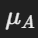
  es la media de los salarios en el grupo A (Varón cis).

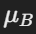es la media de los salarios en el grupo B (mujer cis + Diversidades).

## **Estadístico (Pivote):**


  **Definimos el nivel de significancia**$\hspace{1cm} \alpha=0.05$

  **Estadístico (Pivote)**


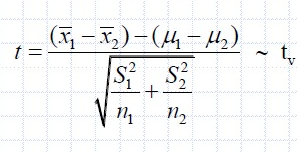

  Donde 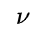 son los grados de libertad:

  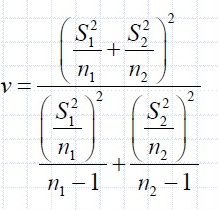
  
  **Distribución del estadístico**

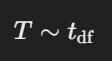

Donde df son los grados de libertad





Para poder tomar una decisión sobre la hipótesis nula, debemos calcular el valor *p* asociado al estadístico de prueba.
- Si el valor p es menor que un nivel de significancia predefinido (0.05), entonces rechazamos la hipótesis nula en favor de la hipótesis alternativa, lo que sugiere que hay evidencia suficiente para afirmar que hay una diferencia significativa en la distribución de los salarios entre los grupos A y B.
- Si el valor p es mayor que el nivel de significancia predefinido (0.05), entonces no rechazamos la hipótesis nula. En este caso, no hay suficiente evidencia para afirmar que hay una diferencia significativa en la distribución de los salarios entre los grupos A y B.

Siendo la Hipótesis Alternativa (Dos Colas) la que afirma que las medias de los dos grupos son diferentes entre sí. Es decir, hay alguna diferencia en la distribución de los salarios entre los grupos A y B.


Formalmente:
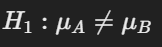

Aunque también puede plantearse otra Hipótesis Alternativa (Una Cola) donde afirma que las medias de los dos grupos son diferentes de una manera específica. Puede ser que la media de un grupo sea mayor que la del otro, o que sea menor.


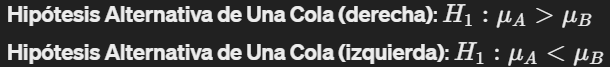

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

El test de Welch se aplicaría en esta situación debido a las diferencias significativas en las varianzas entre los grupos, como indican los resultados de las pruebas de Levene y Bartlett.

In [ ]:
# Importar la función para el test de Welch
from scipy.stats import ttest_ind

# Aplicar el test de Welch
t_statistic, p_value_welch = ttest_ind(filtered_groupA, filtered_groupB, equal_var=False)

# Imprimir el resultado
print("Estadístico t de Welch:", t_statistic)
print("Valor p del test de Welch:", p_value_welch)

# Comparar el valor p con el nivel de significancia
alpha = 0.05
if p_value_welch < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para afirmar que hay una diferencia significativa en la distribución de los salarios entre los grupos A y B.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia significativa en la distribución de los salarios entre los grupos A y B.")


Estadístico t de Welch: 7.4183105114154
Valor p del test de Welch: 1.9306174119862805e-13
Se rechaza la hipótesis nula. Hay evidencia suficiente para afirmar que hay una diferencia significativa en la distribución de los salarios entre los grupos A y B.


# En conclusión:

- Hay evidencia suficiente para afirmar que hay una diferencia significativa en la distribución de los salarios entre los grupos de varon cis y mujeres cis + Diversidades.

- Los varones cis tienen un salario neto promedio más alto que el grupo combinado de Mujeres cis y Diversidades. Siendo para el primer grupo 486030 (Varón cis) y para el segundo 414890 (Mujer cis + Diversidades).

- Obervamos que las mujeres cis y diversidades ganan un 14,6% menos que los varones cis ante similares tareas de programación.

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

# Definir parámetros
effect_size = (mean_salary_groupA - mean_salary_groupB) / std_filtered_A  # Tamaño del efecto (diferencia de medias estandarizada)
alpha = 0.05  # Nivel de significancia
power_values = [0.8, 0.9, 0.95]  # Valores de poder estadístico deseados

# Calcular el tamaño de muestra necesario para diferentes valores de poder estadístico
sample_sizes = {}
for power in power_values:
    sample_sizes[power] = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')

# Imprimir los tamaños de muestra necesarios
for power, sample_size in sample_sizes.items():
    print("Tamaño de muestra para un poder estadístico de", power, ":", round(sample_size))

Tamaño de muestra para un poder estadístico de 0.8 : 250
Tamaño de muestra para un poder estadístico de 0.9 : 334
Tamaño de muestra para un poder estadístico de 0.95 : 413


El poder estadístico de un test es la probabilidad de que el test detecte una diferencia significativa entre dos grupos cuando realmente existe una diferencia en la población. Es decir, es la capacidad del test para evitar cometer un error de tipo II (no detectar una diferencia real cuando realmente existe). Un poder estadístico alto indica una mayor capacidad del test para detectar efectos o diferencias reales si existen.

Dado que el poder estadístico está relacionado con la probabilidad de detectar una diferencia real, un poder estadístico más alto es generalmente preferible, ya que indica una mayor confiabilidad en los resultados del test.

En cuanto a si la muestra es lo suficientemente grande para ser representativa de la tendencia general y para ser utilizada en un juicio penal por discriminación, hay varios factores a considerar:

- Representatividad de la muestra: Aunque el tamaño de la muestra calculado parece adecuado para detectar diferencias significativas, es importante asegurarse de que la muestra sea representativa de la población en estudio. Si la muestra no es representativa, los resultados podrían no generalizarse adecuadamente a la población en su conjunto.
- Calidad de los datos: La calidad de los datos es crucial para la validez de cualquier análisis estadístico. Se debe verificar la integridad de los datos y la fiabilidad de las mediciones antes de confiar en los resultados.
- Contexto y relevancia: En un juicio penal por discriminación, la relevancia de los resultados y la interpretación de los hallazgos son fundamentales. Además del análisis estadístico, se necesitarían pruebas adicionales y un análisis más amplio del contexto y las circunstancias específicas del caso.


Por lo tanto, si la muestra es representativa, los datos son confiables y los resultados son relevantes para el contexto del caso, el tamaño de muestra calculado parece adecuado para detectar diferencias significativas y podría proporcionar una base sólida para tomar decisiones informadas. Sin embargo, es importante considerar todos los factores relevantes antes de utilizar los resultados en un contexto legal o de toma de decisiones importantes.

De los resultados de nuestros datos obtenemos que:

- Para un poder estadístico de 0.8, se necesitaría una muestra de tamaño 250 para tener una probabilidad del 80% de detectar una diferencia significativa entre los dos grupos si realmente existe una diferencia en la población.
- Para un poder estadístico de 0.9, se necesitaría una muestra de tamaño 334 para tener una probabilidad del 90% de detectar una diferencia significativa entre los dos grupos si realmente existe una diferencia en la población.
- Para un poder estadístico de 0.95, se necesitaría una muestra de tamaño 413 para tener una probabilidad del 95% de detectar una diferencia significativa entre los dos grupos si realmente existe una diferencia en la población.


Estos resultados nos indican **la cantidad mínima de observaciones que se necesitarían para alcanzar un cierto nivel de confianza en la capacidad del test para detectar diferencias reales entre los grupos**. Un tamaño de muestra mayor aumenta la probabilidad de detectar diferencias significativas si realmente existen.

2) Respecto de la pregunta si esta muestra es lo suficientemente grande para ser representativa de la tendencia general y si podria ser utilizada  en un juicio penal contra una empresa XX por una causa de discriminación

Es esencial planificar con antelación el alcance y el marco de aplicación de un experimento, especialmente si se pretende utilizar en un contexto legal. El diseño del estudio debe ser cuidadosamente estructurado con este propósito en mente. El primer problema respecto de ***la potencia estadística***, que es la capacidad del estudio para detectar efectos significativos, debe ser determinada antes de la realización del experimento. En el caso presentado, la falta de evidencia sobre el diseño del estudio para su aplicabilidad legal podría ser problemático a la hora de generalizar los resultado y ligarlo a un comportamiento discriminitario, legalmente penalizado. Además, se deben considerar varios aspectos clave, como el ***tamaño de la muestra, la variabilidad muestral, el tamaño del efecto y la proporción de asignación entre los grupos.*** Una muestra más grande proporciona más *poder estadístico*, lo que mejora la precisión y la exactitud de las conclusiones. La participación de la población en el estudio también es crucial para obtener resultados representativos. A su vez, la presencia de ***conglomerados*** dentro de la muestra puede sesgar las conclusiones finales y debe ser evitada o detectada. En resumen, el estudio analizado parece carecer de los requisitos necesarios para su aplicabilidad en un contexto legal, lo que sugiere que sus conclusiones no deben ser utilizadas como base para decisiones legales, ya que requiere una evaluación cuidadosa de múltiples factores (consultar con expertos en estadísticas, derecho y ética para obtener orientación específica sobre un caso particular).

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave:
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle.
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


## **Adjuntamos archivo PDF con la consigna resuelta**